In [2]:
import torch
import mne
import pickle
import numpy as np

In [3]:
from Data_processing import load_data
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from mne.decoding import Scaler
from mne import create_info
epochs = load_data(file_path='data/resampled_epochs_subj_0_corrected.pkl') 
tmin = 0
tmax = 0.746875
epochs.crop(tmin=tmin, tmax=tmax)
# Scale the data
info = create_info(ch_names=epochs.ch_names, sfreq=epochs.info['sfreq'], ch_types='eeg') 
scaler = Scaler(info=info, scalings='median', with_mean=True, with_std=True)
scaler.fit(epochs.get_data())
X = scaler.transform(epochs.get_data())
print(X.shape)

(2989, 128, 192)


# Add noise
bad channels:
* 53 --> red
* 63 --> red
* 112 --> green
* 56 --> purple (subject 1)

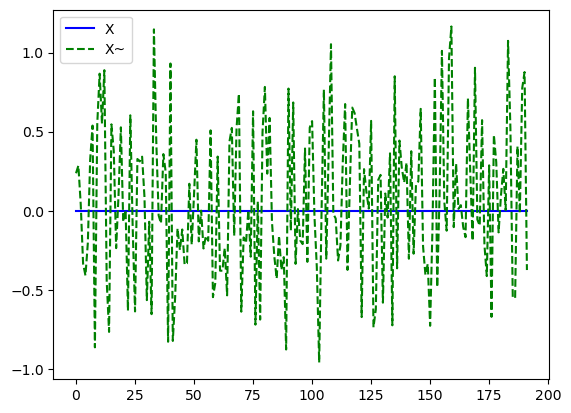

In [4]:
import matplotlib.pyplot as plt
gaussian_noise = np.random.normal(0, 0.5, X.shape)
X_noise = X + gaussian_noise

plt.plot(X[40,63,:], label='X', color='blue')
plt.plot(X_noise[0,63,:], label='X~', color='green', linestyle='dashed')
plt.legend()
plt.show()

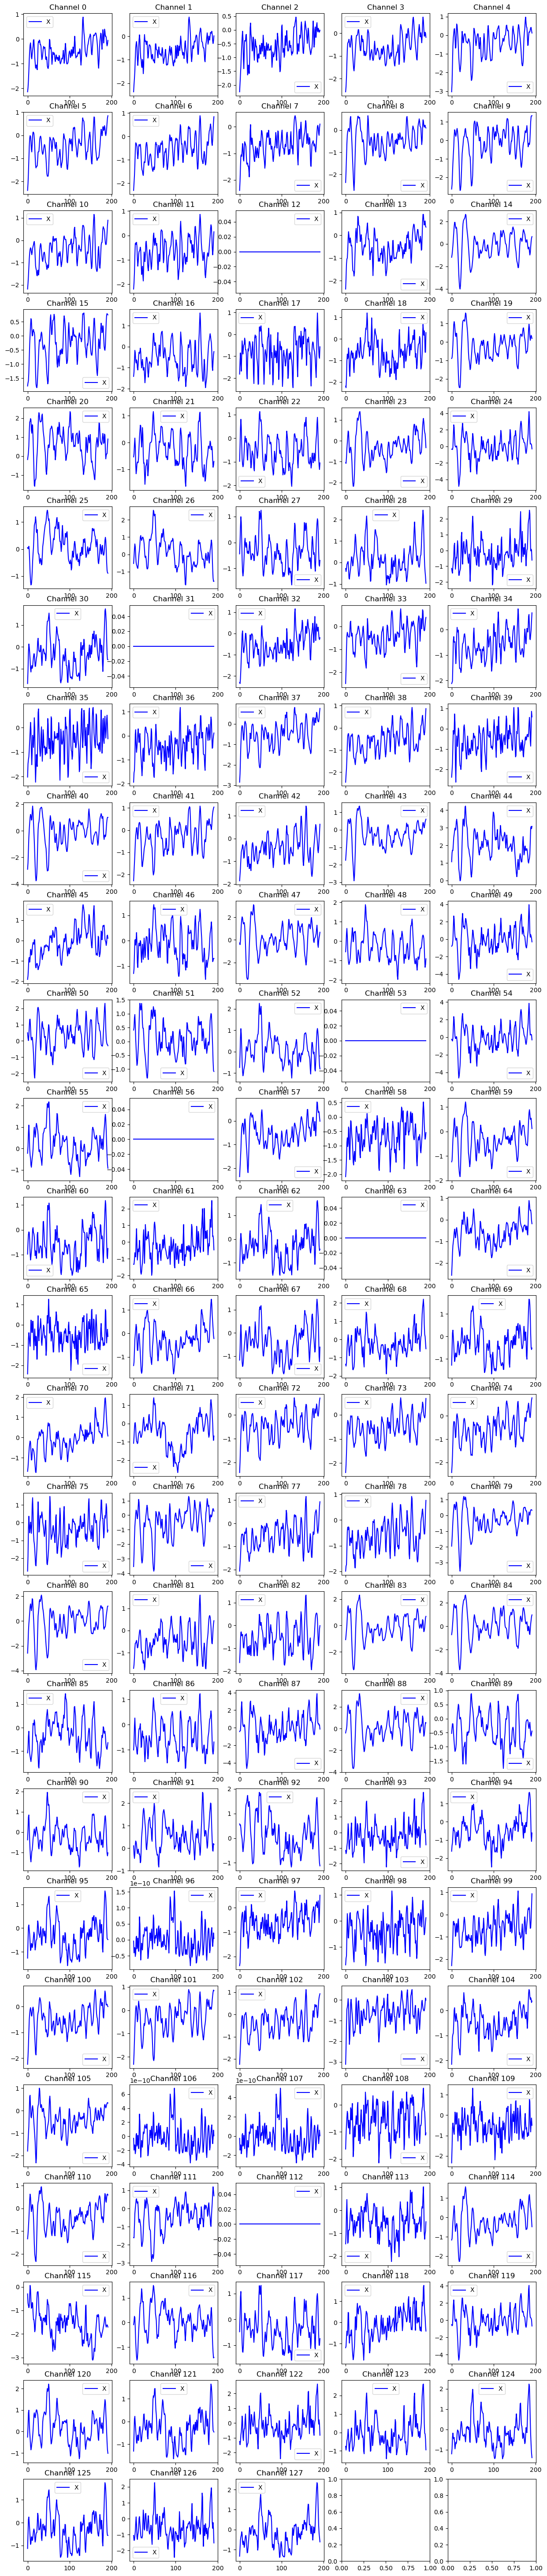

In [5]:


# Generate Gaussian noise
gaussian_noise = np.random.normal(0, 0.5, X.shape)
X_noise = X + gaussian_noise

# Randomly select 25 channels
#channels = np.random.choice(range(X.shape[1]), size=25, replace=False)
channels = np.arange(128)

# Create a 5x5 subplot
fig, axs = plt.subplots(26, 5, figsize=(15, 15*5))

for i, ax in enumerate(axs.flatten()):
    if i < channels.shape[0]:
        channel = channels[i]
        ax.plot(X[1133, channel, :], label='X', color='blue')
        #ax.plot(X_noise[353, channel, :], label='X~', color='green', linestyle='dashed')
        ax.legend()
        ax.set_title(f'Channel {channel}')

#plt.tight_layout()
plt.show()

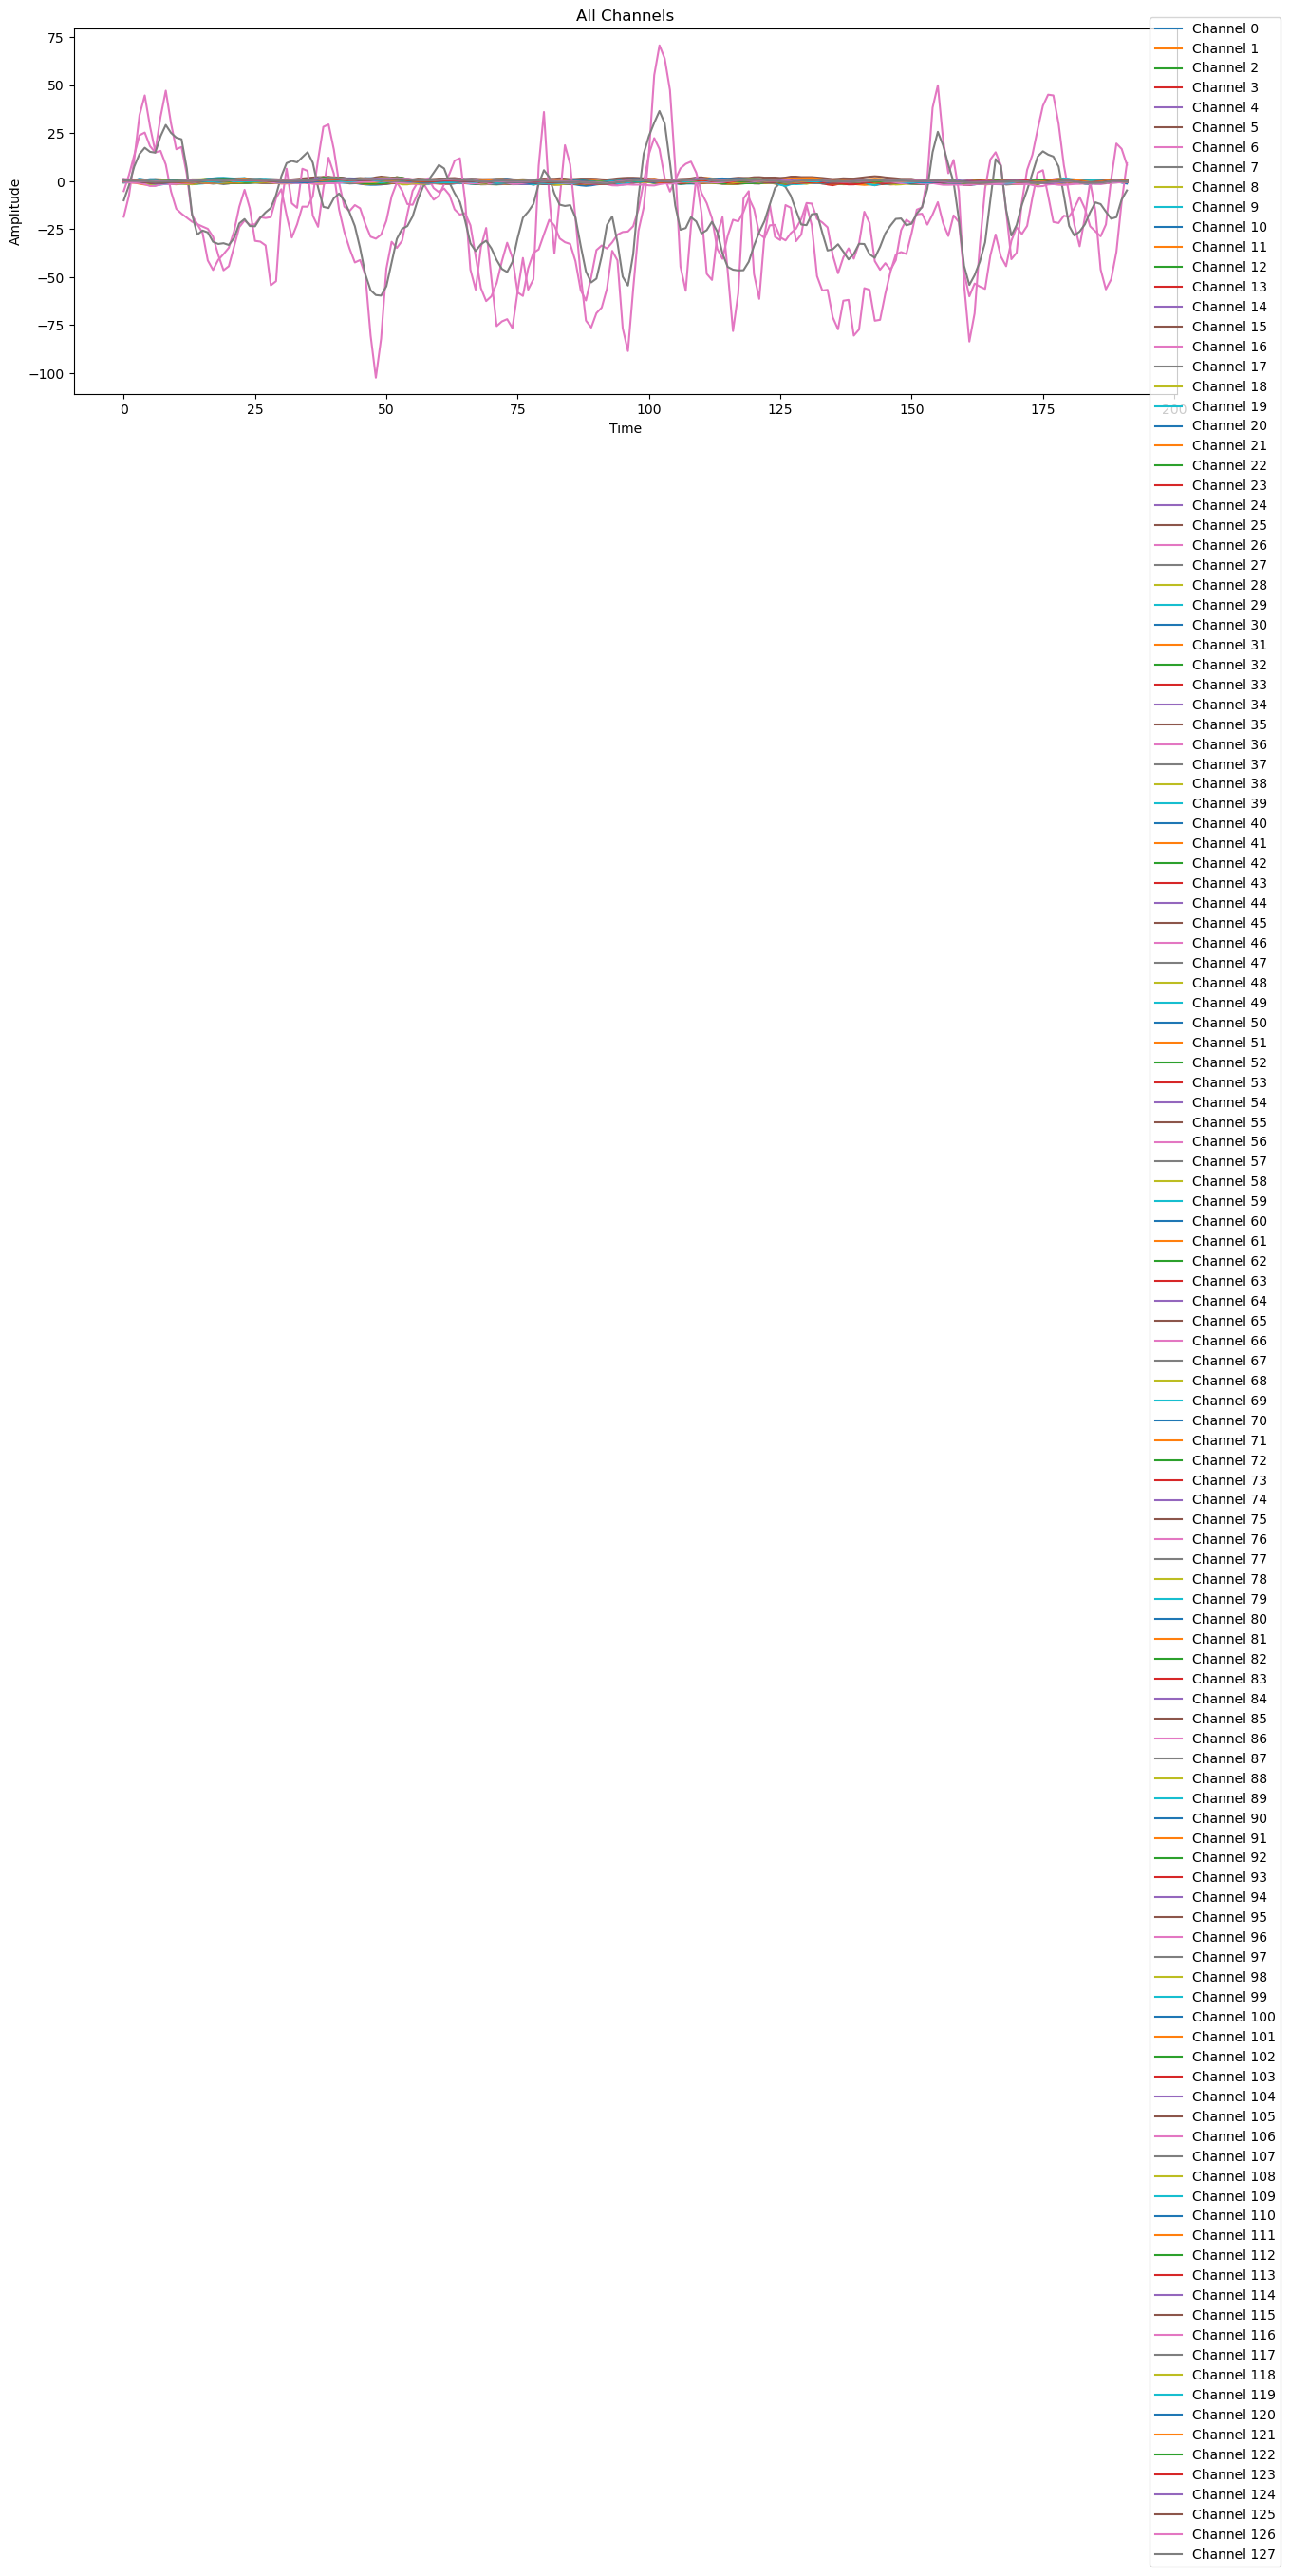

In [6]:
# All channels for one epoch
epoch_number = 2813
# Create a plot
plt.figure(figsize=(15, 5))

# Loop over all channels
#for channel in range(X.shape[1]):
for channel in range(128):
    plt.plot(X[epoch_number, channel, :], label=f'Channel {channel}')

plt.title('All Channels')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.show()

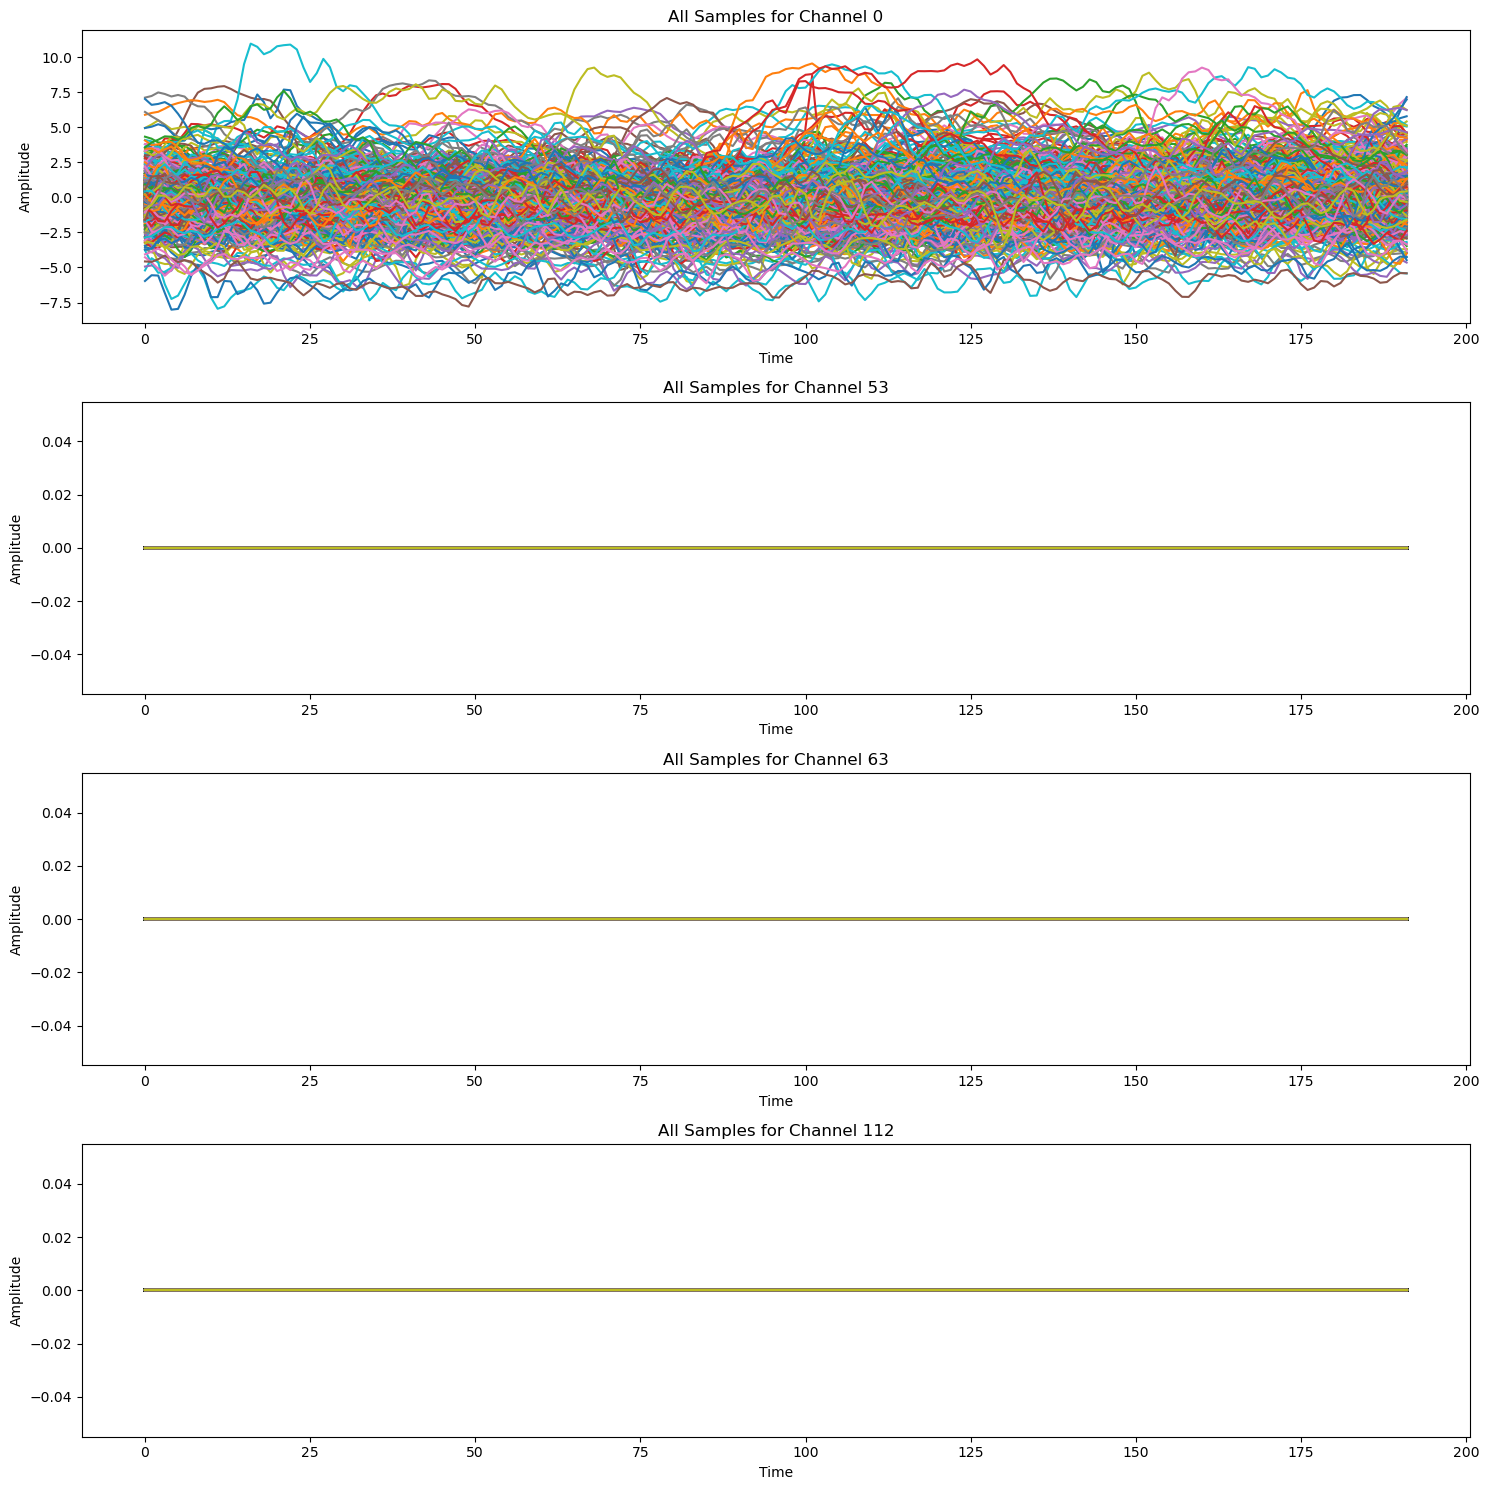

In [7]:
# All epochs for the problematic channels

# Define the channels
channels = [0,53, 63, 112]

# Create a subplot with 4 panels
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

for i, ax in enumerate(axs):
    channel = channels[i]
    for sample in range(X.shape[0]):
        ax.plot(X[sample, channel, :], label=f'Sample {sample}')
    ax.set_title(f'All Samples for Channel {channel}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    #ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

In [8]:
# Randomly select 25 samples
samples = np.random.choice(range(X.shape[0]), size=25, replace=False)

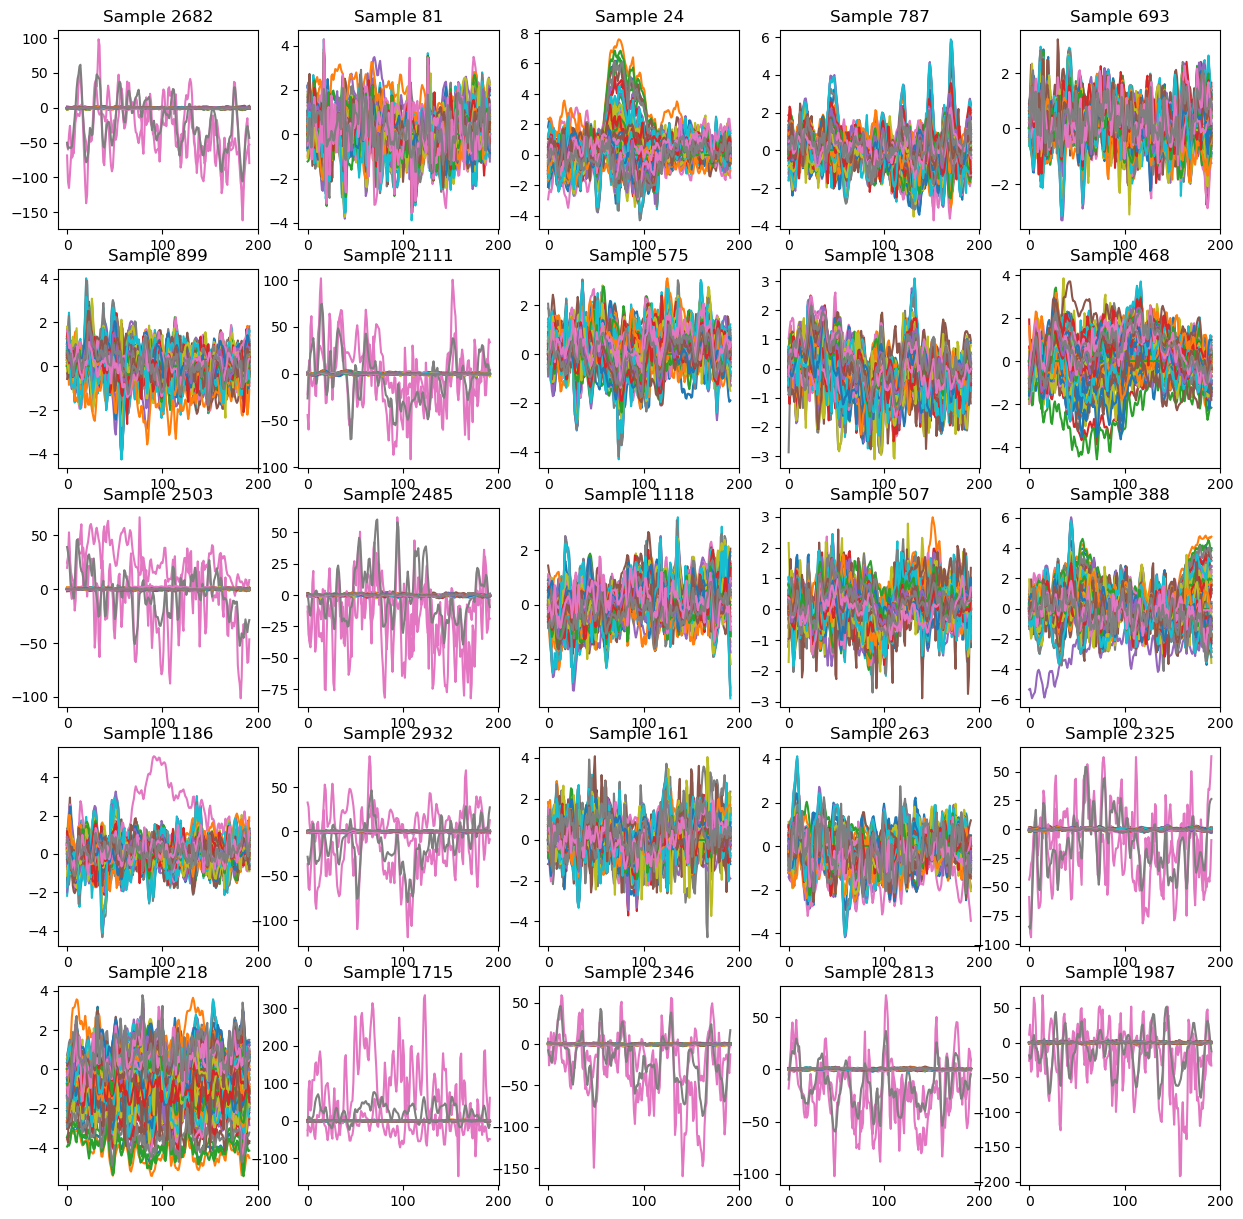

In [9]:
# All channels for 25 random chosen samples

# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    sample = samples[i]
    for channel in range(X.shape[1]):
        ax.plot(X[sample, channel, :], label=f'Channel {channel}')
    #ax.legend()
    ax.set_title(f'Sample {sample}')

#plt.tight_layout()
plt.show()

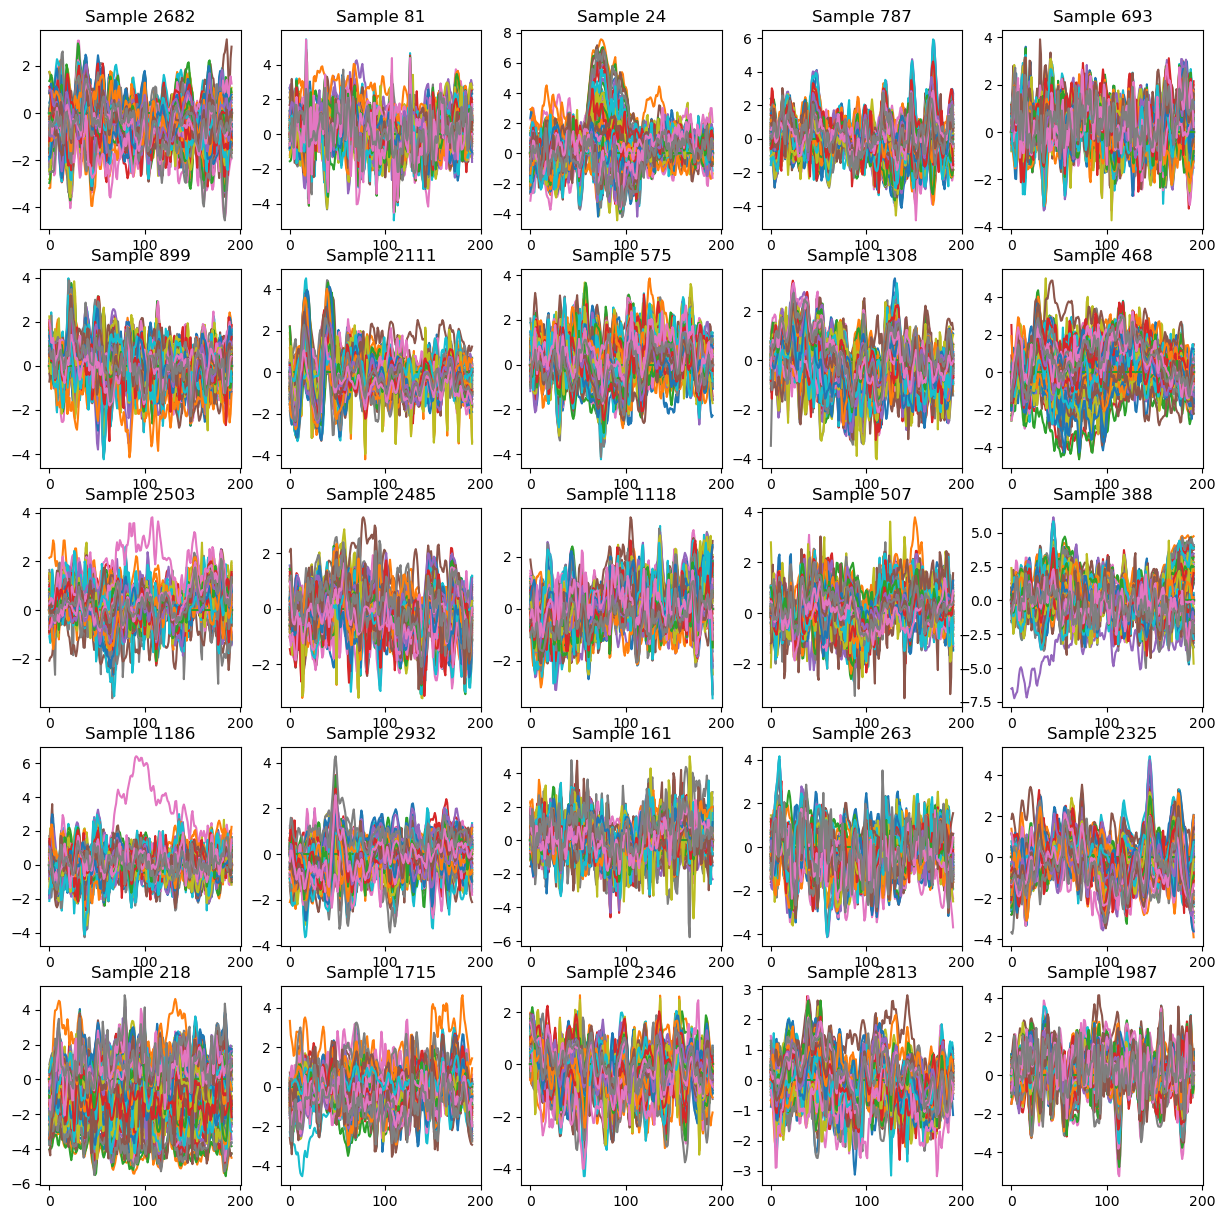

In [12]:
# Scale the data
info = create_info(ch_names=epochs.ch_names, sfreq=epochs.info['sfreq'], ch_types='eeg') 
scaler = Scaler(info=info, scalings='mean', with_mean=True, with_std=True)
scaler.fit(epochs.get_data())
X = scaler.transform(epochs.get_data())
# All channels for 25 random chosen samples

# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    sample = samples[i]
    for channel in range(X.shape[1]):
        ax.plot(X[sample, channel, :], label=f'Channel {channel}')
    #ax.legend()
    ax.set_title(f'Sample {sample}')

#plt.tight_layout()
plt.show()

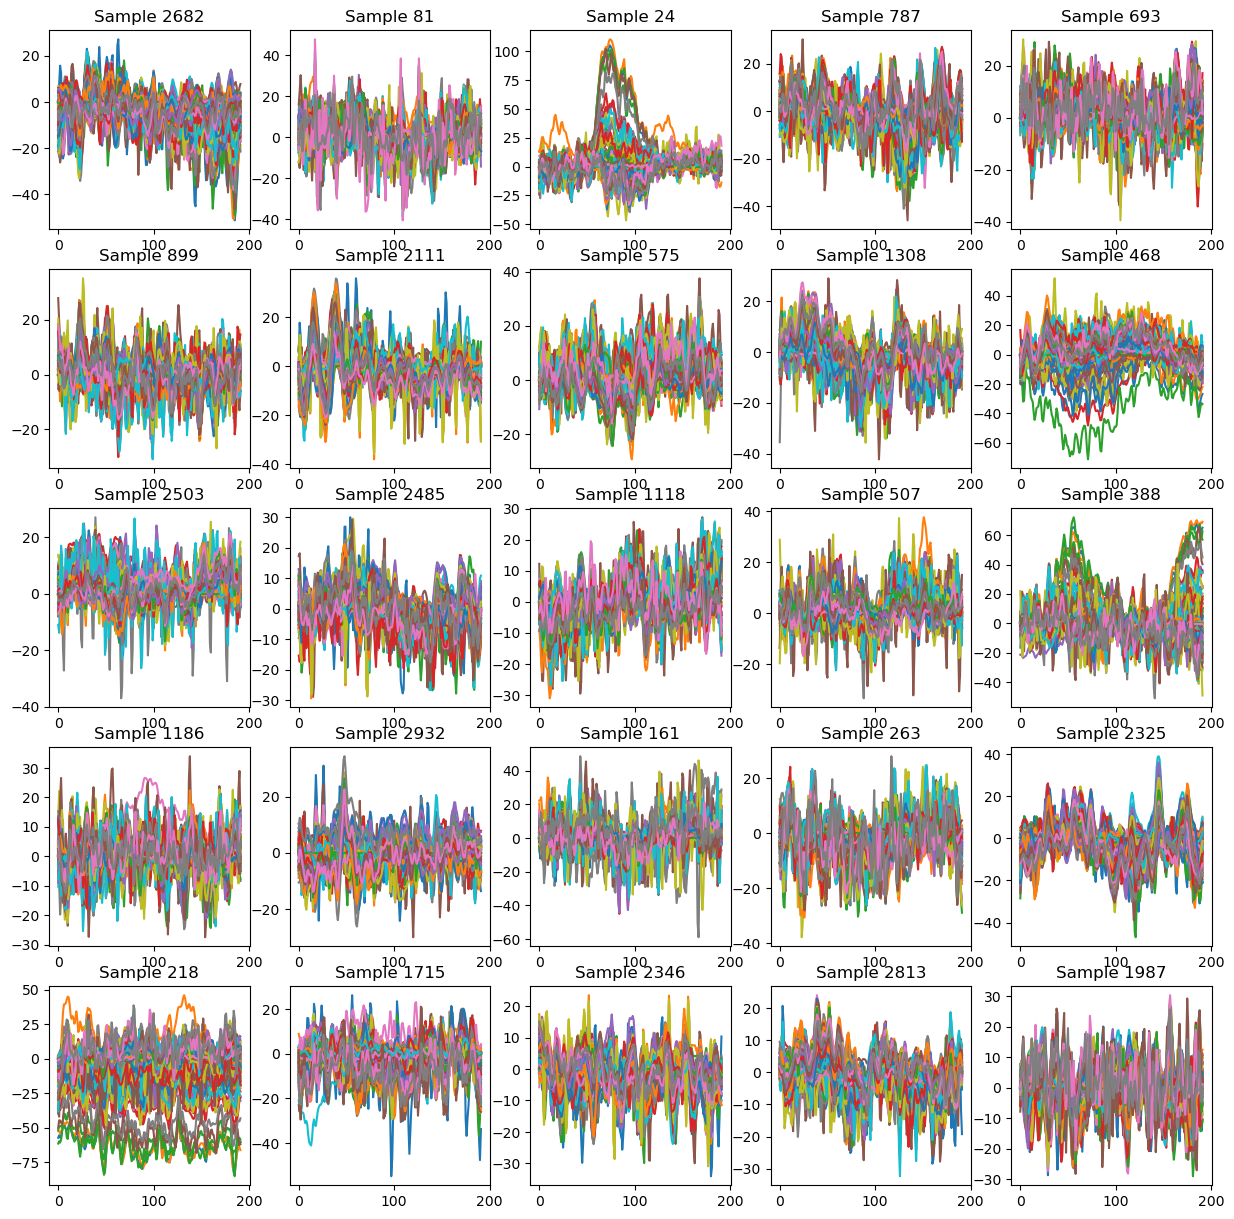

In [13]:
# Scale the data
info = create_info(ch_names=epochs.ch_names, sfreq=epochs.info['sfreq'], ch_types='eeg') 
scaler = Scaler(info=info, scalings=None, with_mean=True, with_std=True)
scaler.fit(epochs.get_data())
X = scaler.transform(epochs.get_data())
# All channels for 25 random chosen samples

# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    sample = samples[i]
    for channel in range(X.shape[1]):
        ax.plot(X[sample, channel, :], label=f'Channel {channel}')
    #ax.legend()
    ax.set_title(f'Sample {sample}')

#plt.tight_layout()
plt.show()

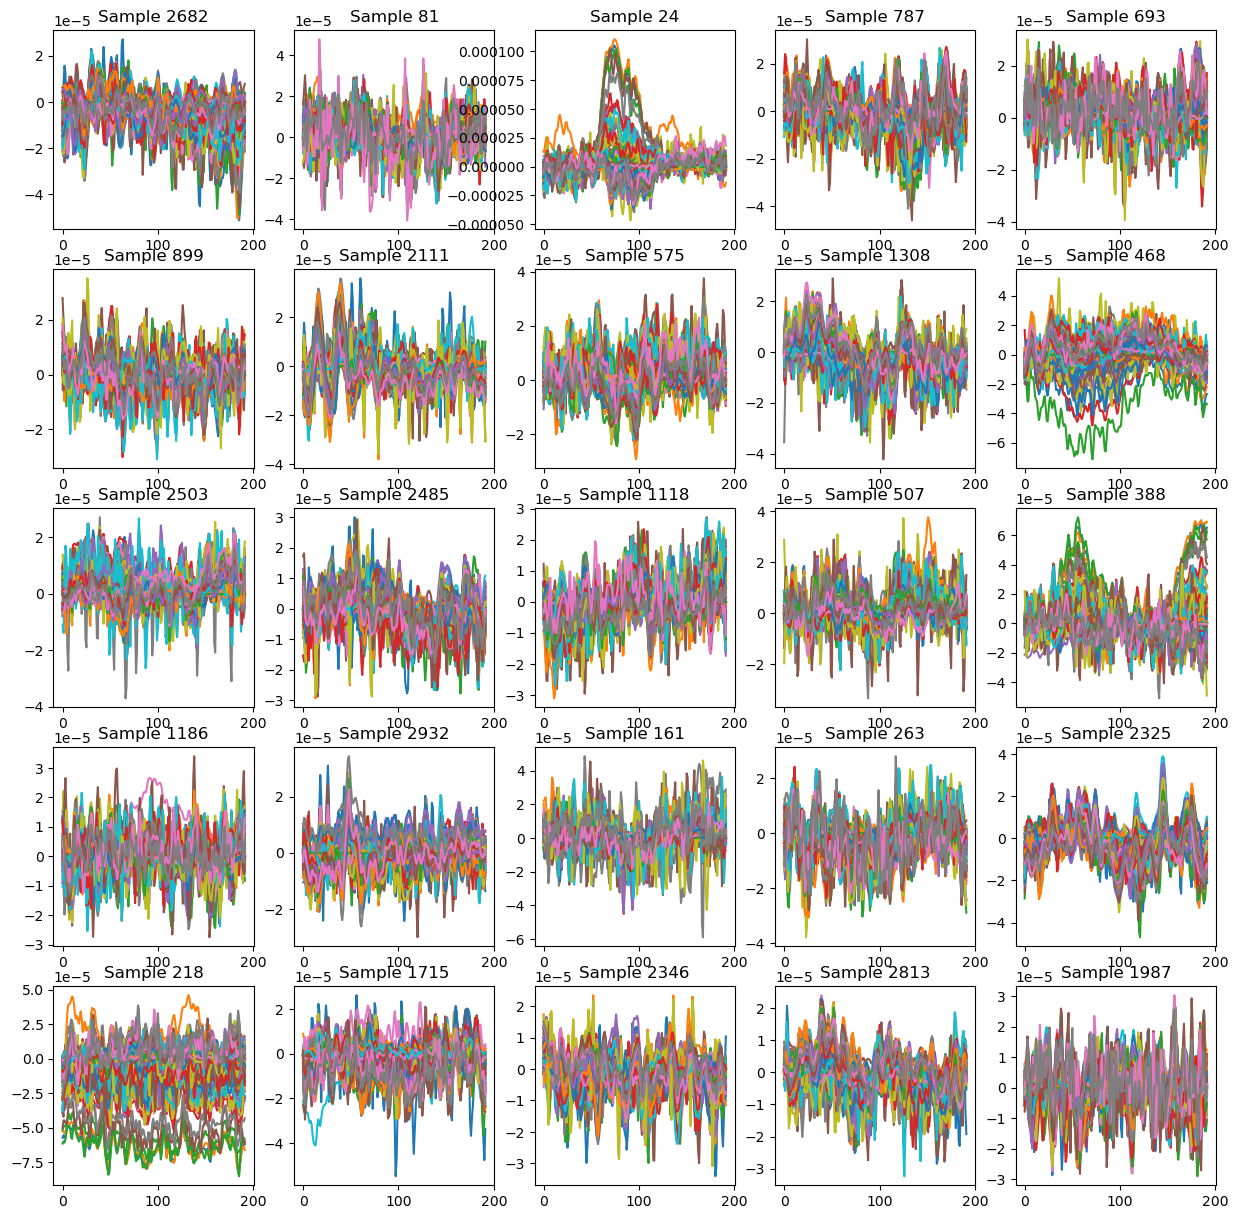

In [11]:
# Scale the data
X = epochs.get_data()
# All channels for 25 random chosen samples

# Create a 5x5 subplot
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    sample = samples[i]
    for channel in range(X.shape[1]):
        ax.plot(X[sample, channel, :], label=f'Channel {channel}')
    #ax.legend()
    ax.set_title(f'Sample {sample}')

#plt.tight_layout()
plt.show()